# SQL

> 1. **Modèle de données:** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.

Schéma de la base de données :


Livre (LivreID, Titre, AuteurID)

Auteur (AuteurID, Nom, Prénom)

Genre (GenreID, Nom)

LivreGenre (LivreID, GenreID)

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

Réponse :


Table Auteur => 1 to many => Table Livre. Clé primaire : Auteur[AuteurID] Clé étrangère: Livre[AuteurID]


> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiare ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



Réponse:
Oui il y a une table intermédiaire qui est la table LivreGenre
On l'identifie par la présence de deux clés étrangères
Il est recommandé d'avoir une table intermédiaire lorsqu'il existe une relation many to many entre deux tables (ici Livre et Genre)


3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/MaskiVal/Html/raw/main/biblio_F.sqlite3.zip")

open('biblio_F.sqlite3.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("biblio_F.sqlite3.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('biblio_F.sqlite3')



Voici une représentation des valeurs de votre base de données :

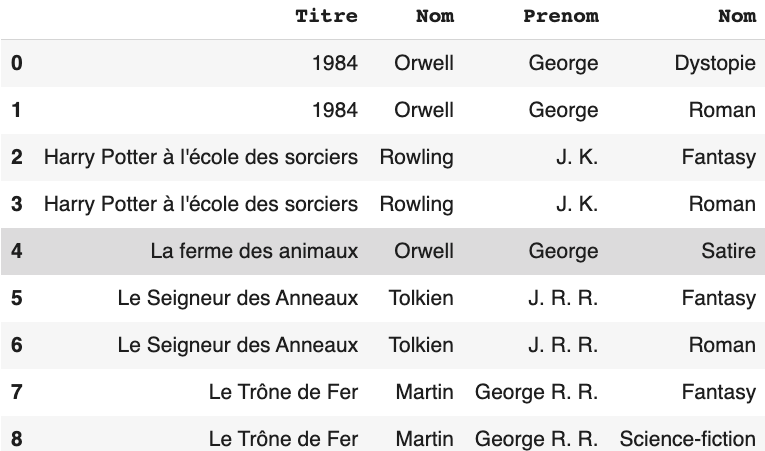

In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("""SELECT * FROM Auteur""", conn)

,AuteurID,Nom,Prenom
0,1,Martin,George R. R.
1,2,Rowling,J. K.
2,3,Tolkien,J. R. R.
3,4,Orwell,George


Effectuer des requêtes, pour répondre aux questions suivantes.

In [ ]:
#Schéma de la base de données :


#Livre (LivreID, Titre, AuteurID)

#Auteur (AuteurID, Nom, Prénom)

#Genre (GenreID, Nom)

#LivreGenre (LivreID, GenreID)

> 3.1 Renvoyer le nom du genre qui contient le plus de livres, ainsi que le nombre de livres pour ce genre.

Résultat attendu:  
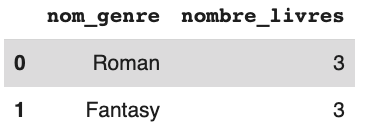

In [ ]:
pd.read_sql("""SELECT Genre.Nom as nom_genre, COUNT(Livre.LivreID) AS nombre_de_livres
                FROM Genre
                LEFT JOIN LivreGenre on LivreGenre.GenreID = Genre.GenreID
                LEFT JOIN Livre on Livre.LivreID = Genre.GenreID
                GROUP BY Genre.Nom
                ORDER BY nombre_de_livres DESC
                LIMIT 2""",conn)

,nom_genre,nombre_de_livres
0,Roman,3
1,Fantasy,3


> 3.2 Renvoyer le nombre de livres et d'auteurs par genre, dans l'ordre décroissant par rapport au nombre de livres.


Résultat attendu:
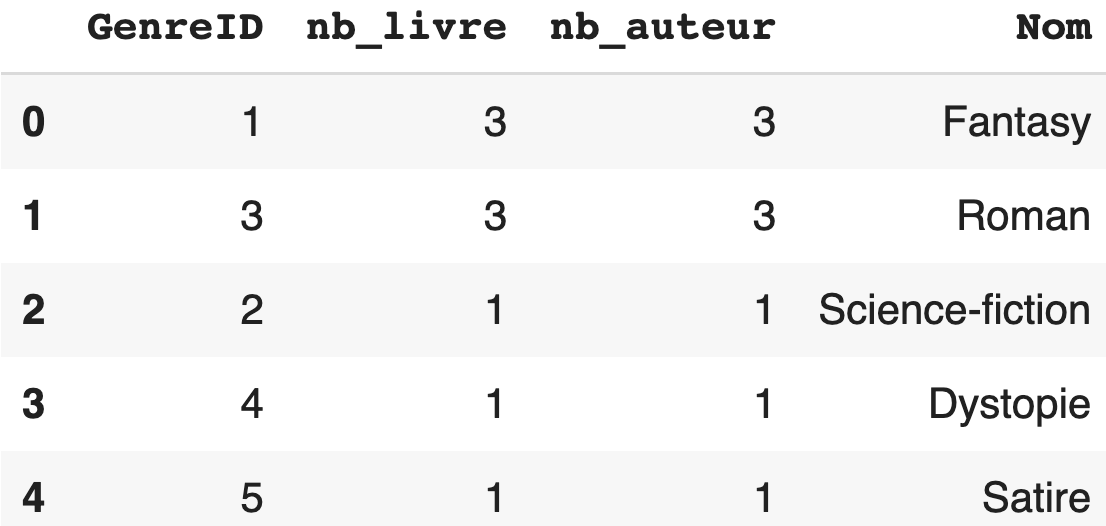

In [ ]:
pd.read_sql("""SELECT Genre.GenreID, COUNT(Livre.LivreID) as nb_livre,
                      COUNT(Auteur.AuteurID) as nb_auteur, Genre.Nom
                      FROM LivreGenre
                      LEFT JOIN Livre on Livre.livreID = LivreGenre.LivreID
                      LEFT JOIN Genre on Genre.GenreID = LivreGenre.GenreID
                      LEFT JOIN Auteur on Auteur.AuteurID = Livre.AuteurID
                      GROUP BY Genre.GenreID, Genre.Nom
                      ORDER BY nb_livre DESC""", conn)

,GenreID,nb_livre,nb_auteur,Nom
0,1,3,3,Fantasy
1,3,3,3,Roman
2,2,1,1,Science-fiction
3,4,1,1,Dystopie
4,5,1,1,Satire


> 3.3 Créer une requête qui renvoie le nombre de genres distincts dans la table Genre.

Résultat attendu:

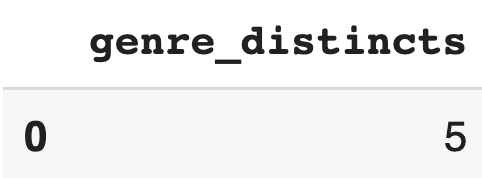

In [ ]:
pd.read_sql("""SELECT COUNT(DISTINCT Genre.GenreID) as genre_distincts
                FROM Genre""", conn)

,genre_distincts
0,5


> 3.4. La bibliothèque souhaite investir dans les auteurs les plus populaires, basé sur le nombre de livres qu'ils ont écrits. Combien de livres a écrit l'auteur le plus prolifique ?

In [ ]:
#Schéma de la base de données :


#Livre (LivreID, Titre, AuteurID)

#Auteur (AuteurID, Nom, Prénom)

#Genre (GenreID, Nom)

#LivreGenre (LivreID, GenreID)

Résultat attendu:

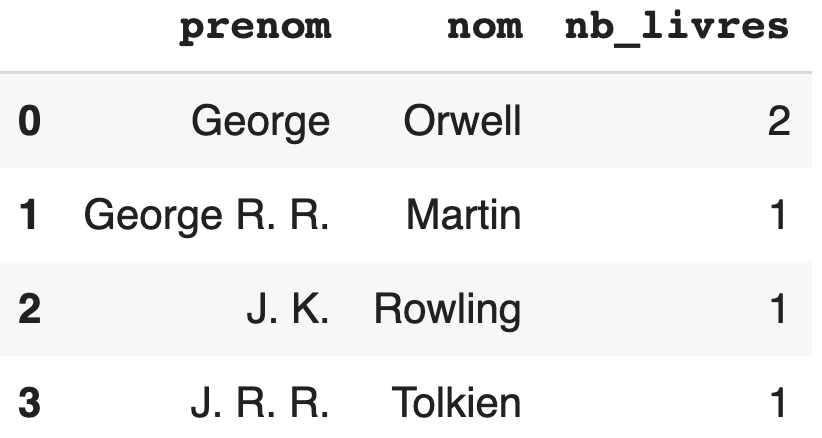

In [ ]:
pd.read_sql("""SELECT Auteur.Prenom as prenom,
                      Auteur.Nom as nom,
                      COUNT(Livre.LivreID) as nb_livres
                FROM Livre
                LEFT JOIN Auteur on Auteur.AuteurID = Livre.AuteurID
                GROUP BY Auteur.AuteurID
                ORDER BY nb_livres DESC, Auteur.Nom ASC""", conn)

,prenom,nom,nb_livres
0,George,Orwell,2
1,George R. R.,Martin,1
2,J. K.,Rowling,1
3,J. R. R.,Tolkien,1


> 3.5 : Trouvez les auteurs qui ont écrit plus d'un livre dans plus d'un genre. Classez-les par ordre décroissant du nombre de livres distincts qu'ils ont écrits, puis par ordre décroissant du nombre de genres distincts dans lesquels ils ont écrit ?.

Résultat attendu:

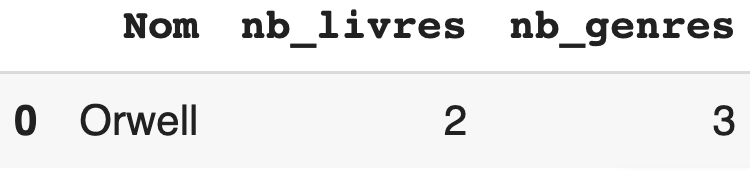

In [ ]:
#Schéma de la base de données :


#Livre (LivreID, Titre, AuteurID)

#Auteur (AuteurID, Nom, Prénom)

#Genre (GenreID, Nom)

#LivreGenre (LivreID, GenreID)

In [ ]:
pd.read_sql("""SELECT Auteur.Nom as nom,
                      COUNT(DISTINCT Livre.LivreID) as nb_livres,
                      COUNT(Genre.GenreID) as nb_genres
                FROM Auteur
                LEFT JOIN Livre on Livre.AuteurID = Auteur.AuteurID
                LEFT JOIN LivreGenre on LivreGenre.LivreID = Livre.LivreID
                LEFT JOIN Genre on Genre.GenreID = LivreGenre.GenreID
                GROUP BY Auteur.Nom
                ORDER BY nb_livres DESC
                LIMIT 1""", conn)

,nom,nb_livres,nb_genres
0,Orwell,2,3


---

#Pandas

##Importation et pré-traitement d'un dataset
---



*Le jeu de données à analyser se trouve à l'adresse suivante : (https://divvy-tripdata.s3.amazonaws.com/index.html). Il y a un fichier par mois, pour un total de 12 fichiers. Chaque fichier contient 13 colonnes avec des types de données variés. Nous allons fusionner les fichiers en un seul et le nommer 'combined_data'.*

In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import datetime
import requests
import zipfile
import io
import os
from math import radians, sin, cos, sqrt, atan2

In [ ]:
####### Importation des datasets depuis le serveur AWS dédiéc (A EXECUTER UNE SEULE FOIS !!!!)

# Liste des noms de fichiers
file_names = [
    "202101-divvy-tripdata.zip",
    "202102-divvy-tripdata.zip",
    "202103-divvy-tripdata.zip",
    "202104-divvy-tripdata.zip",
    "202105-divvy-tripdata.zip",
    "202106-divvy-tripdata.zip",
    "202107-divvy-tripdata.zip",
    "202108-divvy-tripdata.zip",
    "202109-divvy-tripdata.zip",
    "202110-divvy-tripdata.zip",
    "202111-divvy-tripdata.zip",
    "202112-divvy-tripdata.zip"
]

# URL de base
base_url = "https://divvy-tripdata.s3.amazonaws.com/"

# Télécharger chaque fichier
for file_name in file_names:

    url = base_url + file_name
    response = requests.get(url)

    # Extraire le fichier Zip dans le dossier local "wild_divvy_data"
    with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
      the_zip.extractall("wild_divvy_data")


In [ ]:
folder_path = 'wild_divvy_data'

# Obtenir une liste de tous les fichiers CSV dans le dossier local
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialiser un DataFrame vide pour stocker les données combinées
combined_data = pd.DataFrame()

# Parcourir chaque fichier CSV et concaténer ses données au DataFrame combiné
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Afficher les données combinées
combined_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,7ED482EE6C9F5DB2,classic_bike,2021-02-20 15:25:32,2021-02-20 15:59:45,Western Ave & Leland Ave,TA1307000140,NaN,NaN,41.966495,-87.688419,41.950000,-87.660000,member
5595059,203DF22F090C1777,classic_bike,2021-02-09 08:54:38,2021-02-09 09:08:19,Franklin St & Chicago Ave,13017,NaN,NaN,41.896747,-87.635668,NaN,NaN,member
5595060,940161523673F056,docked_bike,2021-02-27 14:46:06,2021-02-27 15:00:49,Franklin St & Chicago Ave,13017,Michigan Ave & Oak St,13042,41.896747,-87.635668,41.900960,-87.623777,casual
5595061,C5538FFA492A7B00,classic_bike,2021-02-09 11:44:17,2021-02-09 11:46:13,Franklin St & Chicago Ave,13017,Wells St & Walton St,TA1306000011,41.896747,-87.635668,41.899930,-87.634430,member


##Pré-traitement



1. Afficher les types des colonnes

In [ ]:
print(combined_data.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


2. Afficher le nombre de valeurs manquantes par colonne

In [ ]:
print(combined_data.isna().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64


3. Identifier et compter les lignes dupliquées pour toutes les colonnes

In [ ]:
print(combined_data.duplicated().value_counts())

False    5595063
Name: count, dtype: int64


In [ ]:
duplicates = combined_data[combined_data.duplicated()]

# Compter le nombre de lignes dupliquées
nombre_de_duplicates = duplicates.shape[0]

print(f"Nombre de lignes dupliquées : {nombre_de_duplicates}")

Nombre de lignes dupliquées : 0


##Traitement

4. Créer un nouveau dataframe en supprimant tous les trajets avec des valeurs manquantes et afficher le nombre de lignes et de colonnes de la nouvelle dataframe

In [ ]:
print(combined_data.shape)

(5595063, 13)


In [ ]:
new_df = combined_data.dropna()
print(new_df.shape)

(4588302, 13)


##Colonnes supplémentaires et transformation des données

Nous ajouterons la distance parcourue en kilomètres à partir des latitudes et longitudes de départ et d'arrivée données. Nous utiliserons la formule de Haversine.

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
# Rayon de la Terre en kilomètres
    R = 6371.0

    # Convertir la latitude et la longitude de degrés en radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculer les différences entre les latitudes et les longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Formule de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculer la distance
    distance = R * c

    return distance


5. Ajouter une nouvelle colonne "distance_travelled_km" en appliquant la fonction haversine sur tous les trajets.

> On rappelle le prototype de la fonction haversine(lat1, lon1, lat2, lon2)



In [ ]:
print(new_df.head().to_markdown())

|    | ride_id          | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |
|---:|:-----------------|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|
|  0 | 6C992BD37A98A63F | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |
|  1 | 1E0145613A209000 | docked_bike     | 2021-04-27 17:27:11 | 2021-04-27 18:31:29 | Dorchester Ave & 49th St | KA1503000069       | Dorchester Ave & 49th St     | KA1503000069     |     41.8058 |    -87.5925 |   41.8058 |  -87.5

In [ ]:
new_df["distance_travelled_km"] = new_df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

<ipython-input-90-3d8022893986>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["distance_travelled_km"] = new_df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)


In [ ]:
print(new_df.head().to_markdown())

|    | ride_id          | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |
|---:|:-----------------|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|
|  0 | 6C992BD37A98A63F | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |                 6.34623 |
|  1 | 1E0145613A209000 | docked_bike     | 2021-04-27 17:27:11 | 2021-04-27 18:31:29 | Dorchester Ave & 49th St | KA1503000069       | Dorchester Ave & 4

6. Analyser les statistiques concernant la colonne "distance_travelled_km".

Que remarquez vous?

In [ ]:
stats = new_df["distance_travelled_km"].describe()
print(stats.to_markdown())

|       |   distance_travelled_km |
|:------|------------------------:|
| count |              4.5883e+06 |
| mean  |              2.12884    |
| std   |              1.8798     |
| min   |              0          |
| 25%   |              0.90385    |
| 50%   |              1.61972    |
| 75%   |              2.81421    |
| max   |             33.8002     |


*Réponse :*
Environ 75% des trajets se font sur une distance inférieure à 3km

7. Pour remédier à ce problème, ajouter une nouvelle colonne "ride_duration_s" pour calculer la période du trajet en secondes

In [ ]:
new_df["started_at"] = pd.to_datetime(new_df["started_at"])
new_df["ended_at"] = pd.to_datetime(new_df["ended_at"])

<ipython-input-93-2fe9925dc17b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["started_at"] = pd.to_datetime(new_df["started_at"])
<ipython-input-93-2fe9925dc17b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["ended_at"] = pd.to_datetime(new_df["ended_at"])


In [ ]:
new_df["ride_duration_s"] = (new_df["ended_at"] - new_df["started_at"]).dt.total_seconds()

<ipython-input-94-125683fef79c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["ride_duration_s"] = (new_df["ended_at"] - new_df["started_at"]).dt.total_seconds()


In [ ]:
print(new_df.head().to_markdown())

|    | ride_id          | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |
|---:|:-----------------|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|
|  0 | 6C992BD37A98A63F | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |                 6.34623 |              1879 |
|  1 | 1E0145613A209000 | docked_bike     | 2021-04-27 17:27:11 | 2021-04-27 18:31:29 | Dorche

8. Analyser les statistiques concernant la colonne "ride_duration_s".

Que remarquez vous?

In [ ]:
print(new_df["ride_duration_s"].describe().to_markdown())

|       |   ride_duration_s |
|:------|------------------:|
| count |       4.5883e+06  |
| mean  |    1308.64        |
| std   |   11065.5         |
| min   |   -3354           |
| 25%   |     417           |
| 50%   |     732           |
| 75%   |    1327           |
| max   |       3.35665e+06 |


*Réponse :* la durée minimale de trajet est de -3354 secondes ce qui n'est pas logique

9. Supprimer les trajets de moins d'une minute

In [ ]:
condition = new_df["ride_duration_s"] > 60
new_df = new_df[condition]
print(new_df.shape)

(4528291, 15)


In [ ]:
print(new_df.head().to_markdown())

|    | ride_id          | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |
|---:|:-----------------|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|
|  0 | 6C992BD37A98A63F | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |                 6.34623 |              1879 |
|  1 | 1E0145613A209000 | docked_bike     | 2021-04-27 17:27:11 | 2021-04-27 18:31:29 | Dorche

In [ ]:
print(new_df["ride_duration_s"].describe().to_markdown())

|       |   ride_duration_s |
|:------|------------------:|
| count |       4.52829e+06 |
| mean  |    1325.67        |
| std   |   11137.6         |
| min   |      61           |
| 25%   |     428           |
| 50%   |     743           |
| 75%   |    1339           |
| max   |       3.35665e+06 |


10. Créer une colonne "speed_mph" afin d'analyser la vitesse en calculant la vitesse du km/h vers mph.



In [ ]:
# création de la colonne durée en heure
new_df["ride_duration_h"] = (new_df["ride_duration_s"] / 3600).round(2)

In [ ]:
print(new_df.head().to_markdown())

|    | ride_id          | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |   ride_duration_h |
|---:|:-----------------|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|------------------:|
|  0 | 6C992BD37A98A63F | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |                 6.34623 |              1879 |              0.52 |
|  1 | 1E0145613A209000 | docked_b

In [ ]:
# création de la colonne km/h pour la conversion
new_df["km/h"] = new_df["distance_travelled_km"] / new_df["ride_duration_h"]

In [ ]:
# conversion
new_df["speed_mph"] = new_df["km/h"] / 1.6093

11. Supprimer les données avec une vitesse supérieure à 45 km/h (~28 mph, vitesse maximale des vélos aux États-Unis).

In [ ]:
print(new_df.head(10).to_markdown())

|    | ride_id          | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |   ride_duration_m |   ride_duration_h |        km/h |   speed_mph |
|---:|:-----------------|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|------------------:|------------------:|------------:|------------:|
|  0 | 6C992BD37A98A63F | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |     

In [ ]:
new_df = new_df[new_df["speed_mph"] <= 28]
print(new_df)

                  ride_id rideable_type          started_at  \
0        6C992BD37A98A63F  classic_bike 2021-04-12 18:25:36   
1        1E0145613A209000   docked_bike 2021-04-27 17:27:11   
2        E498E15508A80BAD   docked_bike 2021-04-03 12:42:45   
3        1887262AD101C604  classic_bike 2021-04-17 09:17:42   
4        C123548CAB2A32A5   docked_bike 2021-04-03 12:42:25   
...                   ...           ...                 ...   
5595049  B883DC64BFA8D34E  classic_bike 2021-02-27 23:47:30   
5595053  933F61AEAC149167  classic_bike 2021-02-12 08:09:33   
5595055  1B94F316B15C79E0   docked_bike 2021-02-27 21:07:45   
5595060  940161523673F056   docked_bike 2021-02-27 14:46:06   
5595061  C5538FFA492A7B00  classic_bike 2021-02-09 11:44:17   

                   ended_at              start_station_name start_station_id  \
0       2021-04-12 18:56:55           State St & Pearson St     TA1307000061   
1       2021-04-27 18:31:29        Dorchester Ave & 49th St     KA1503000069   
2  

In [ ]:
print(new_df.shape)

(4528289, 18)


12. Supprimer les colonnes ("ride_id" et "speed_kph") pour un chargement plus rapide

In [ ]:
new_df = new_df.drop(columns = ["ride_id", "km/h"])

13. * Supprimer les espaces de fin pour les colonnes de type chaîne de caractères.

  * Il y a des données qui sont des trajets de test (avec 'test' inclus dans le nom de la station et l'identifiant de la station). Nous supprimerons également ces données.

In [ ]:
for col in new_df.columns:
  if new_df[col].dtype == 'object':
    new_df[col] = new_df[col].str.strip()

In [ ]:
print(new_df.shape)

(4475300, 17)


In [ ]:
for col in new_df.columns:
  if 'test' in new_df[col].values:
    new_df = new_df[new_df[col].str.contains('test') == False]

In [ ]:
print(new_df.shape)

(4528289, 16)


14. Ajouter les catégories suivantes pour découvrir les motifs basés sur le temps :

* day_of_week : Lundi, Mardi, Mercredi, etc.
* day_type : Jour de semaine ou Week-end
* month : Janvier, Février, Mars, etc.
* season : Hiver, Printemps, Été, Automne

    **Créer une fonction pour day_type**

    **Créer une fonction pour season**

In [ ]:
# Traitement 'day_of_week' et 'month'
new_df['day_of_week'] = new_df['started_at'].dt.day_name()
new_df['month'] = new_df['started_at'].dt.month_name()


In [ ]:
print(new_df.head().to_markdown())

|    | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |   ride_duration_h |   speed_mph | day_of_week   | month   |
|---:|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|------------------:|------------:|:--------------|:--------|
|  0 | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |                 6.34623 |              1879 |              0.52 |     7.5836 

In [ ]:
#Fonction pour 'day_type'
def day_type(day):
  if day in ['Saturday', 'Sunday']:
    return 'Weekend'
  else:
    return 'Weekday'

In [ ]:
#Application de la fonction pour 'day_type'
new_df["day_type"] = new_df["day_of_week"].apply(day_type)


In [ ]:
#Fonction pour 'season'
def season(month):
  if month in ['December', 'January', 'February']:
    return 'Winter'
  elif month in ['March', 'April', 'May']:
    return 'Spring'
  elif month in ['June', 'July', 'August']:
    return 'Summer'
  else:
    return 'Autumn'


In [ ]:
#Application de la fonction pour 'season'
new_df["season"] = new_df["month"].apply(season)

In [ ]:
print(new_df.head().to_markdown())

|    | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |   ride_duration_h |   speed_mph | day_of_week   | month   | day_type   | season   |
|---:|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|------------------:|------------:|:--------------|:--------|:-----------|:---------|
|  0 | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |                 6.34623 |    

15. Ajouter la colonne 'route_type' (même 'start_station_name' et 'end_station_name') pour classifier les trajets comme trajet aller-retour ou trajet aller simple.

In [ ]:
# prompt: Ajouter la colonne 'route_type' (même 'start_station_name' et 'end_station_name') pour classifier les trajets comme trajet aller-retour ou trajet aller simple

new_df['route_type'] = 'Aller Simple'
new_df.loc[new_df['start_station_name'] == new_df['end_station_name'], 'route_type'] = 'Aller-Retour'


In [ ]:
print(new_df.head(20).to_markdown())

|    | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |   ride_duration_h |   speed_mph | day_of_week   | month   | day_type   | season   | route_type   |
|---:|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|------------------:|------------:|:--------------|:--------|:-----------|:---------|:-------------|
|  0 | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287 |   41.9481 |  -87.6639 | member          |

16. Ajouter la colonne "ride_duration_min" qui représente la durée du trajet en minutes.

In [ ]:
new_df["ride_duration_min"] = (new_df["ride_duration_s"] / 60).round()

In [ ]:
print(new_df.head().to_markdown())

|    | rideable_type   | started_at          | ended_at            | start_station_name       | start_station_id   | end_station_name             | end_station_id   |   start_lat |   start_lng |   end_lat |   end_lng | member_casual   |   distance_travelled_km |   ride_duration_s |   ride_duration_h |   speed_mph | day_of_week   | month   | day_type   | season   | route_type   |   ride_duration_min |
|---:|:----------------|:--------------------|:--------------------|:-------------------------|:-------------------|:-----------------------------|:-----------------|------------:|------------:|----------:|----------:|:----------------|------------------------:|------------------:|------------------:|------------:|:--------------|:--------|:-----------|:---------|:-------------|--------------------:|
|  0 | classic_bike    | 2021-04-12 18:25:36 | 2021-04-12 18:56:55 | State St & Pearson St    | TA1307000061       | Southport Ave & Waveland Ave | 13235            |     41.8974 |    -87.6287

17. Renommer tes colonnes pour qu'elles soient pretes pour la dataViz

In [ ]:
# renommer
# réorganiser

In [ ]:
new_df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual',
       'distance_travelled_km', 'ride_duration_s', 'ride_duration_h',
       'speed_mph', 'day_of_week', 'month', 'day_type', 'season', 'route_type',
       'ride_duration_min'],
      dtype='object')

In [ ]:
# Renommer les colonnes
new_df.rename(columns={
    'rideable_type': 'type_de_ride',
    'started_at': 'debut_du_ride',
    'ended_at': 'fin_du_ride',
    'start_station_name': 'nom_station_depart',
    'start_station_id': 'id_station_depart',
    'end_station_name': 'nom_station_arrivee',
    'end_station_id': 'id_station_arrivee',
    'start_lat': 'latitude_depart',
    'start_lng': 'longitude_depart',
    'end_lat': 'latitude_arrivee',
    'end_lng': 'longitude_arrivee',
    'member_casual': 'type_membre',
    'distance_travelled_km': 'distance_km',
    'ride_duration_s': 'duree_sec',
    'ride_duration_h': 'duree_h',
    'speed_mph': 'vitesse_mph',
    'day_of_week': 'jour_de_la_semaine',
    'month': 'mois',
    'day_type': 'type_de_jour',
    'season': 'saison',
    'ride_duration_min': 'duree_min'
}, inplace=True)

# Réorganiser les colonnes par groupes logiques
colonnes_reorganisees = [
    # Informations sur la station
    'nom_station_depart', 'id_station_depart', 'nom_station_arrivee', 'id_station_arrivee',

    # Coordonnées
    'latitude_depart', 'longitude_depart', 'latitude_arrivee', 'longitude_arrivee',

    # Données temporelles
    'debut_du_ride', 'fin_du_ride', 'jour_de_la_semaine', 'mois', 'type_de_jour', 'saison',

    # Données de trajet
    'type_de_ride', 'distance_km', 'duree_sec', 'duree_min', 'duree_h', 'vitesse_mph',

    # Type de membre
    'type_membre'
]

# Réorganiser les colonnes dans le dataframe
new_df = new_df[colonnes_reorganisees]

In [ ]:
# Afficher le résultat
print(new_df.head().to_markdown())

|    | nom_station_depart       | id_station_depart   | nom_station_arrivee          | id_station_arrivee   |   latitude_depart |   longitude_depart |   latitude_arrivee |   longitude_arrivee | debut_du_ride       | fin_du_ride         | jour_de_la_semaine   | mois   | type_de_jour   | saison   | type_de_ride   |   distance_km |   duree_sec |   duree_min |   duree_h |   vitesse_mph | type_membre   |
|---:|:-------------------------|:--------------------|:-----------------------------|:---------------------|------------------:|-------------------:|-------------------:|--------------------:|:--------------------|:--------------------|:---------------------|:-------|:---------------|:---------|:---------------|--------------:|------------:|------------:|----------:|--------------:|:--------------|
|  0 | State St & Pearson St    | TA1307000061        | Southport Ave & Waveland Ave | 13235                |           41.8974 |           -87.6287 |            41.9481 |            -87.6639 | 

18. Vérifier les caractéristiques des dataframes avant l'export du dataset nettoyé

In [ ]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4528289 entries, 0 to 5595061
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   nom_station_depart   object        
 1   id_station_depart    object        
 2   nom_station_arrivee  object        
 3   id_station_arrivee   object        
 4   latitude_depart      float64       
 5   longitude_depart     float64       
 6   latitude_arrivee     float64       
 7   longitude_arrivee    float64       
 8   debut_du_ride        datetime64[ns]
 9   fin_du_ride          datetime64[ns]
 10  jour_de_la_semaine   object        
 11  mois                 object        
 12  type_de_jour         object        
 13  saison               object        
 14  type_de_ride         object        
 15  distance_km          float64       
 16  duree_sec            float64       
 17  duree_min            float64       
 18  duree_h              float64       
 19  vitesse_mph          float

In [ ]:
new_df.shape

(4528289, 21)

##Extraire le dataframe pour l'analyse

19. Exporter le dataframe pour l'utiliser par la suite dans un Notebook d'analyse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_df.to_csv("/content/drive/MyDrive/DataSets/df_cyclistic_clean.csv", index=False)

In [ ]:
# Extract csv file
from google.colab import files
new_df.to_csv('df_cyclistic_clean.csv', index=False)
files.download('df_cyclistic_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>